In [1]:
# load the dataset
import pandas as pd
import numpy as np

# read the .csv file
telco_churn = pd.read_csv("../data/telco_customer_churn.csv")

# understand the data
print(telco_churn.head())
print(telco_churn.info())

# some notes:
# all 7043 - no missing values. However, TotalCharges being object is not normal - should be float

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [2]:
# investigate TotalCharges - make a new column
telco_churn["TotalCharges_numeric"] = pd.to_numeric(telco_churn["TotalCharges"], errors="coerce")
telco_churn[telco_churn["TotalCharges_numeric"].isna()]

# the TotalCharges there are missing! - but why are they not being labeled as NaN? - and not come up as null?
# due to .read_csv check them as "" - so an empty string

# concern - what if other columns also have this issue?

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_numeric
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No,NaN
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No,NaN
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,,No,NaN
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No,NaN
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No,NaN
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No,NaN
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No,NaN
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No,NaN
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No,NaN
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,No,Two year,No,Mailed check,73.35,,No,NaN


In [3]:
# Count entries that are empty or just whitespace
(telco_churn.map(lambda x: isinstance(x, str) and x.strip() == "")).sum()

customerID               0
gender                   0
SeniorCitizen            0
Partner                  0
Dependents               0
tenure                   0
PhoneService             0
MultipleLines            0
InternetService          0
OnlineSecurity           0
OnlineBackup             0
DeviceProtection         0
TechSupport              0
StreamingTV              0
StreamingMovies          0
Contract                 0
PaperlessBilling         0
PaymentMethod            0
MonthlyCharges           0
TotalCharges            11
Churn                    0
TotalCharges_numeric     0
dtype: int64

In [4]:
# check for fake nulls
fake_nulls = ["NA", "N/A", "null", "?", "None", "--"]
for val in fake_nulls:
    print(f"Checking for: {val}")
    print((telco_churn == val).sum())
    
# none others appear to have this issue.


Checking for: NA
customerID              0
gender                  0
SeniorCitizen           0
Partner                 0
Dependents              0
tenure                  0
PhoneService            0
MultipleLines           0
InternetService         0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
Contract                0
PaperlessBilling        0
PaymentMethod           0
MonthlyCharges          0
TotalCharges            0
Churn                   0
TotalCharges_numeric    0
dtype: int64
Checking for: N/A
customerID              0
gender                  0
SeniorCitizen           0
Partner                 0
Dependents              0
tenure                  0
PhoneService            0
MultipleLines           0
InternetService         0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies 

In [5]:
# drop the 11 rows with missing values
telco_churn["TotalCharges_numeric"] = pd.to_numeric(telco_churn["TotalCharges"], errors="coerce")

telco_churn = telco_churn[telco_churn["TotalCharges_numeric"].notna()].copy()

telco_churn["TotalCharges"] = telco_churn["TotalCharges_numeric"]
telco_churn.drop(columns=["TotalCharges_numeric"], inplace=True)
telco_churn.drop(columns=["customerID"], inplace=True) # not particularly useful


# recheck
print(telco_churn.info())


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

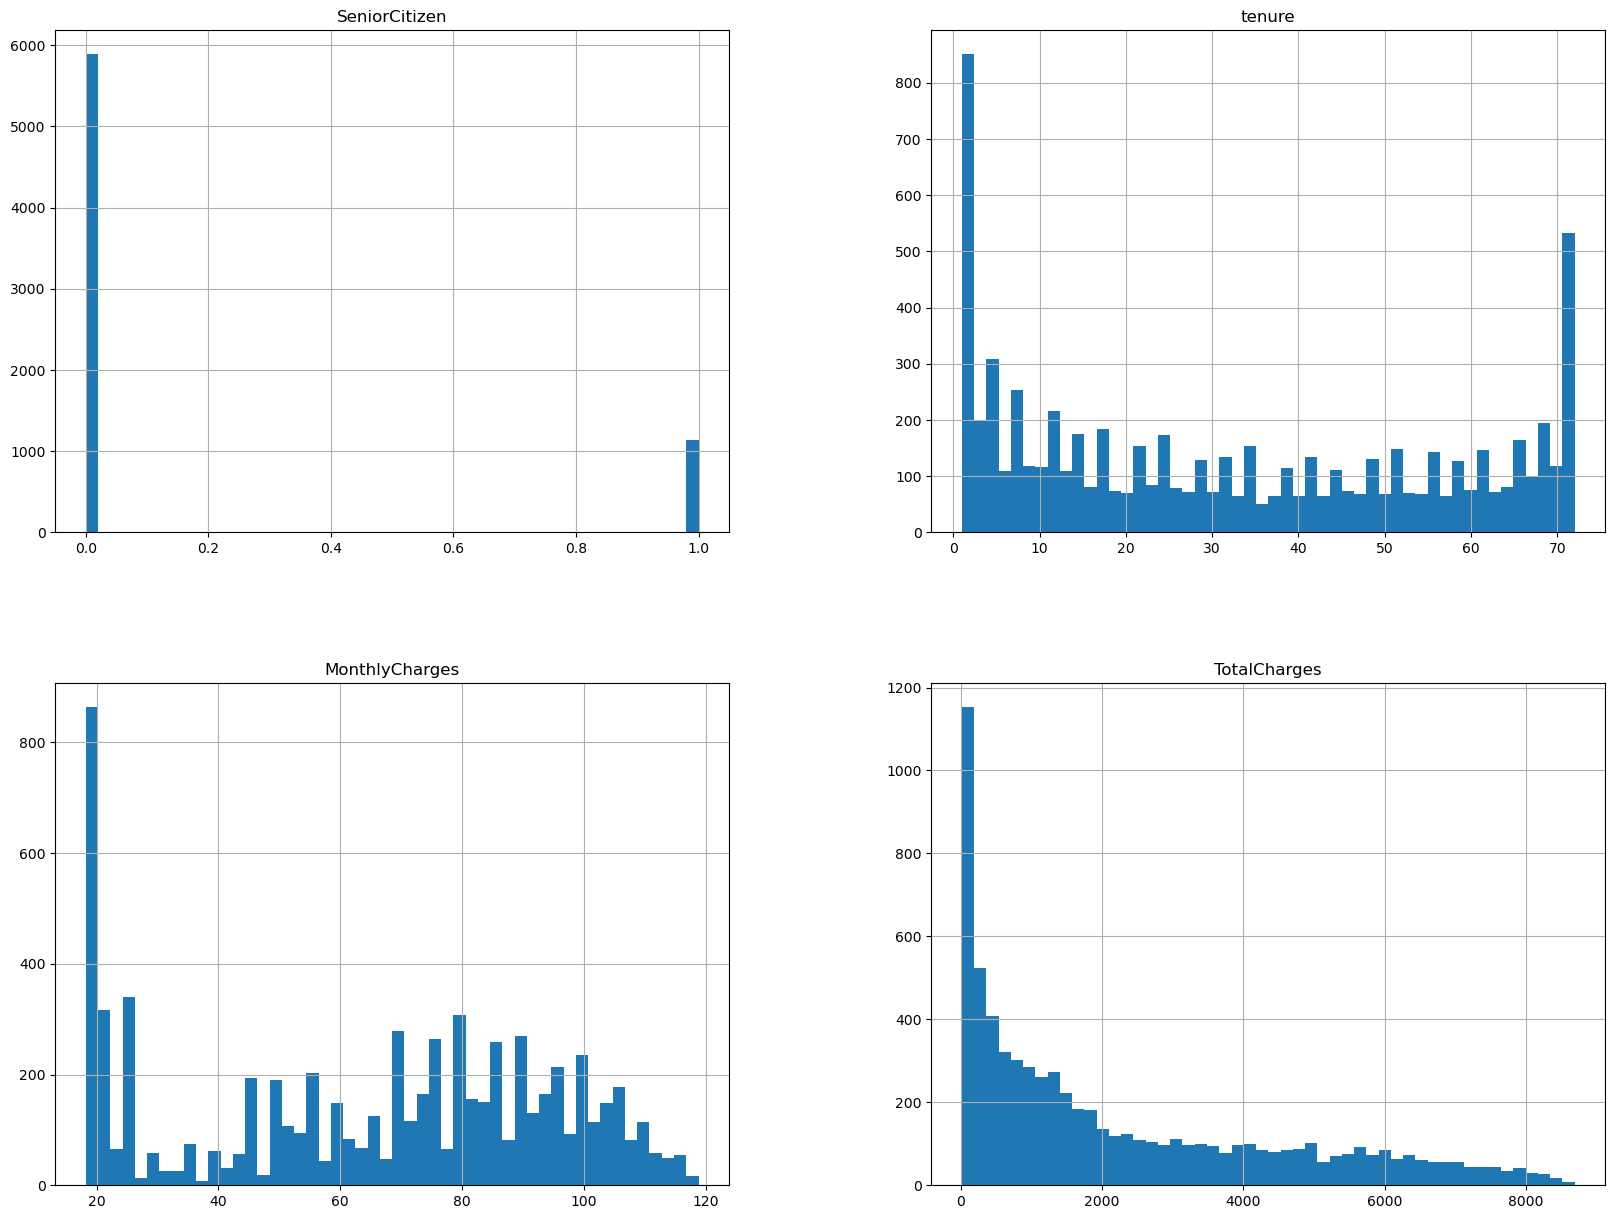

In [6]:
# EDA - get a feel for the data
import matplotlib.pyplot as plt
telco_churn.hist(bins=50, figsize=(20,15)) 
plt.show()

# senior citizen - marked as 0 or 1
# tenure - too many numbers - i need to check if there is a correlation between tenure and churn (yes/no)
# same w monthly charges and total charges - need to plot them against yes/no


c:\Users\marcu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\marcu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\marcu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\marcu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

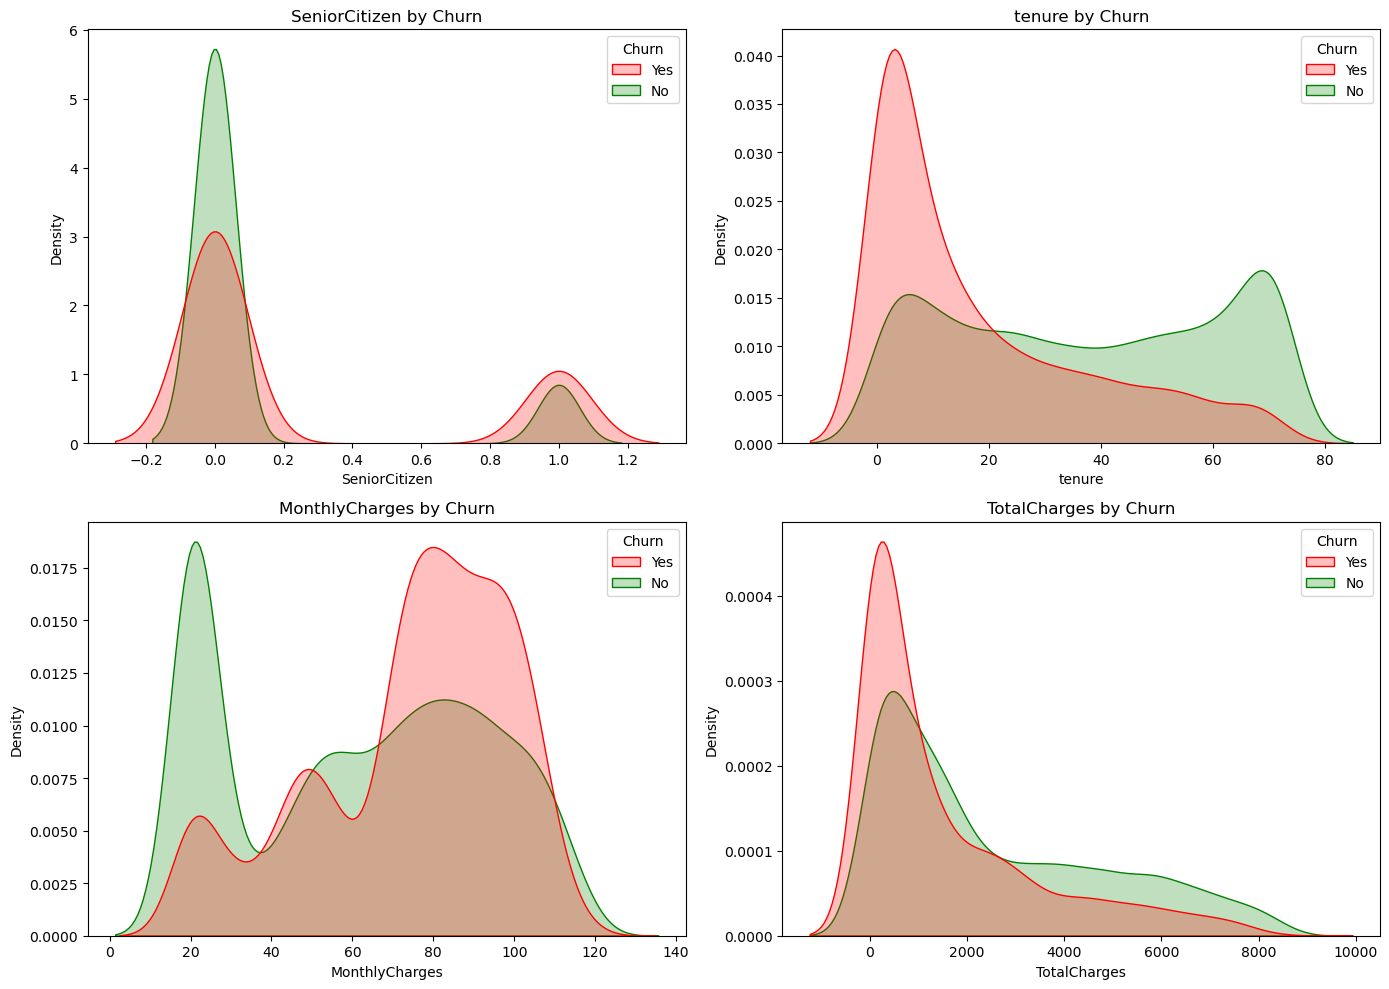

In [7]:
# separate them - check EDA of these numerical variables against churn result 
import seaborn as sns
num_cols = telco_churn.select_dtypes(include=['int64', 'float64']).columns

# set number that appropriates for all the plots
n_cols = 2
n_rows = (len(num_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(14, 5 * n_rows))

# set custom colour
palette = {"Yes": "red", "No": "green"}

for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.kdeplot(data=telco_churn, x=col, hue="Churn", hue_order=["Yes", "No"], palette=palette, common_norm=False, fill=True) # show smooth distribution curve
    plt.title(f'{col} by Churn')
    plt.tight_layout()
    
plt.show()

In [8]:
# check the unique values of object 
for col in telco_churn.select_dtypes(include=['object']).columns:
    print(f"{col}: {telco_churn[col].unique()}")
    
# decide to not merge 'No internet service' with 'No' - since those columns relate back to InternetService - someone can have wifi but not having the onl security

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


PaymentMethod              Churn
Bank transfer (automatic)  No       1284
                           Yes       258
Credit card (automatic)    No       1289
                           Yes       232
Electronic check           No       1294
                           Yes      1071
Mailed check               No       1296
                           Yes       308
dtype: int64
Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1284   258
Credit card (automatic)    1289   232
Electronic check           1294  1071
Mailed check               1296   308


<Axes: xlabel='PaymentMethod'>

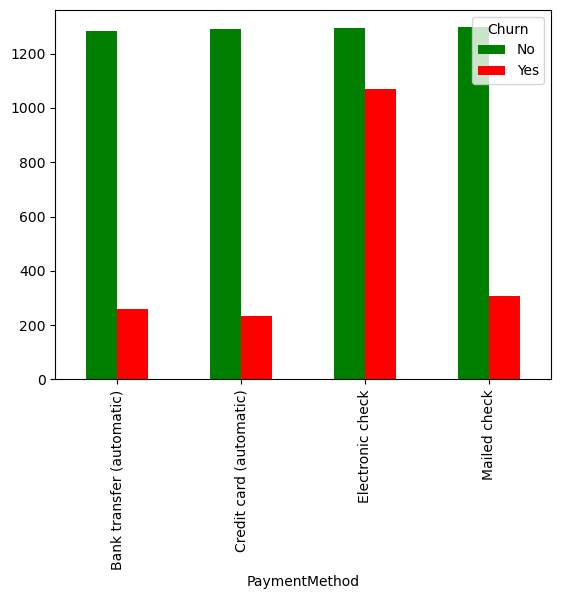

In [9]:
# plotting - categorical variables - against churn (yes/no)

# testing with one category only
print(telco_churn.groupby(['PaymentMethod', 'Churn']).size()) # count the number of rows in each group directly
grouped = telco_churn.groupby(['PaymentMethod', 'Churn']).size().unstack() 
print(grouped) # pivot the No/Yes row to column, and push Churn up  
grouped.plot(kind='bar', color=['green', 'red'])


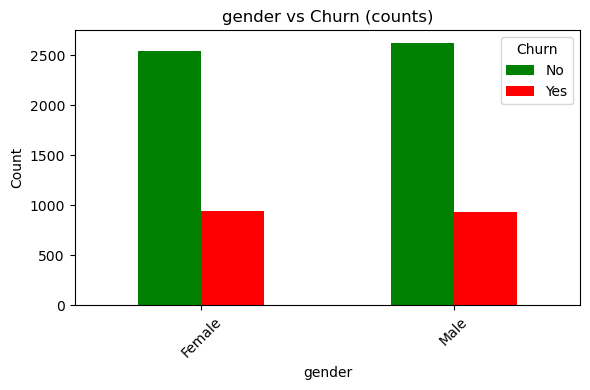

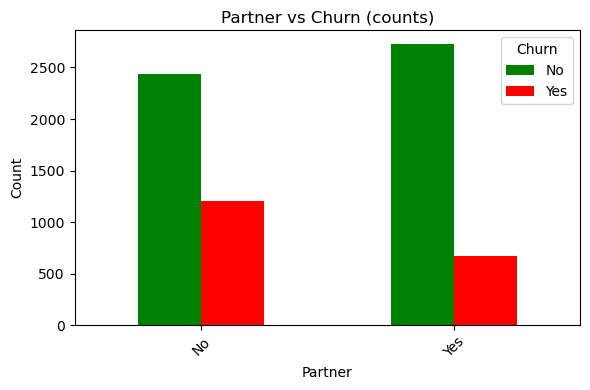

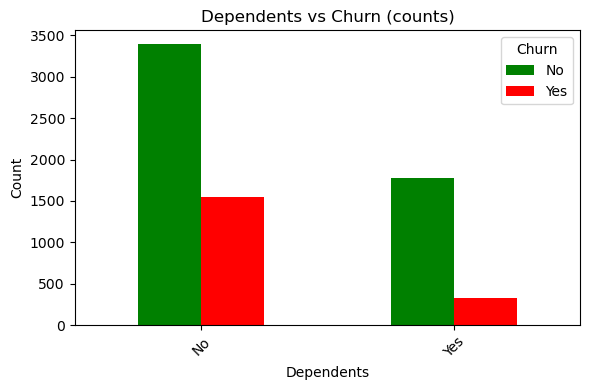

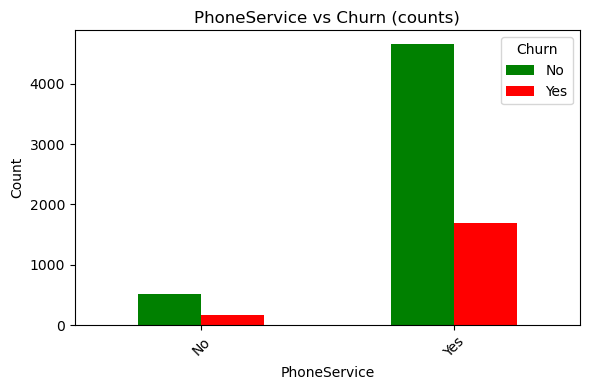

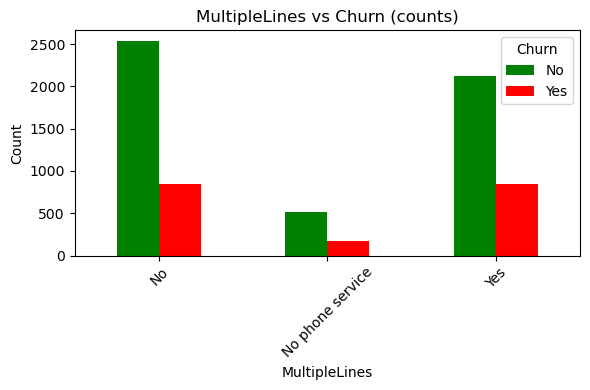

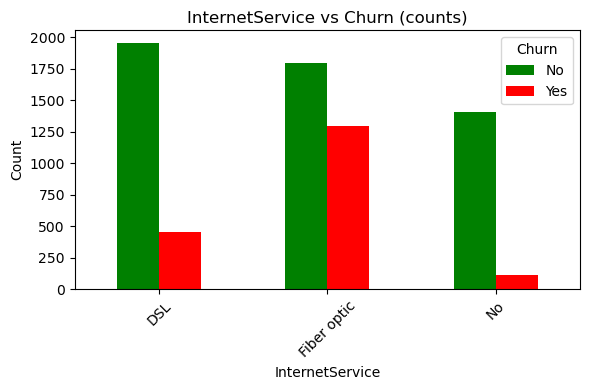

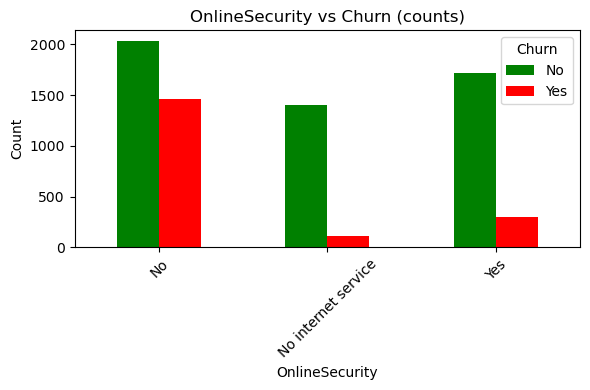

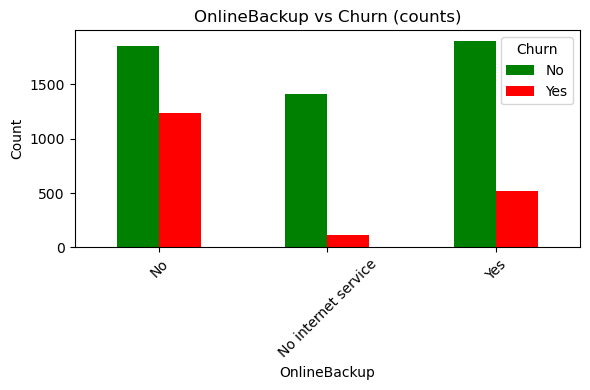

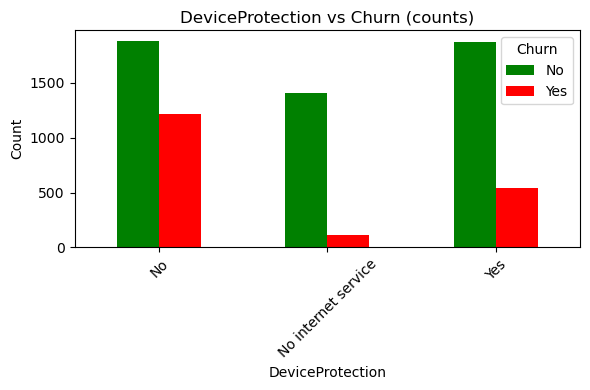

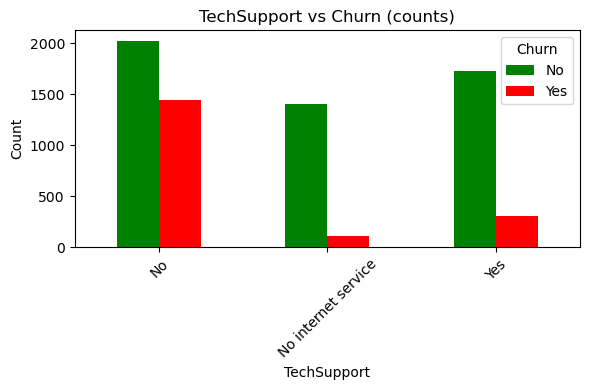

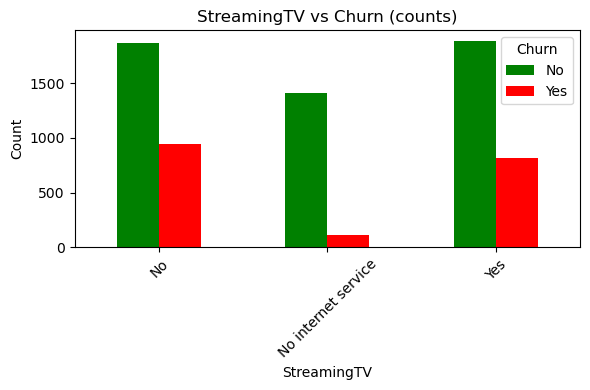

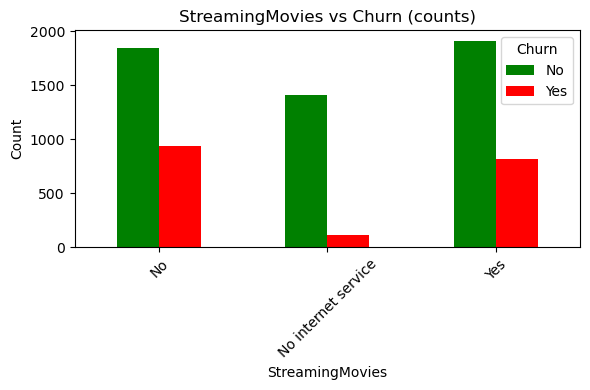

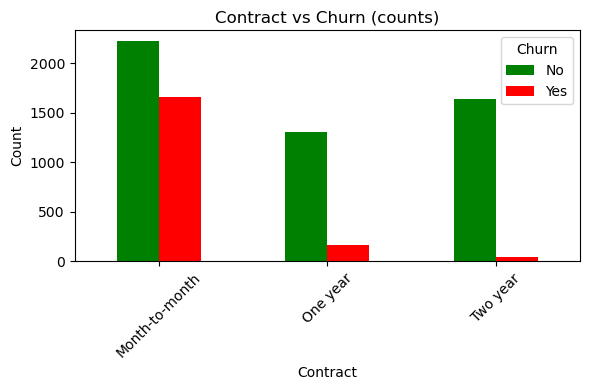

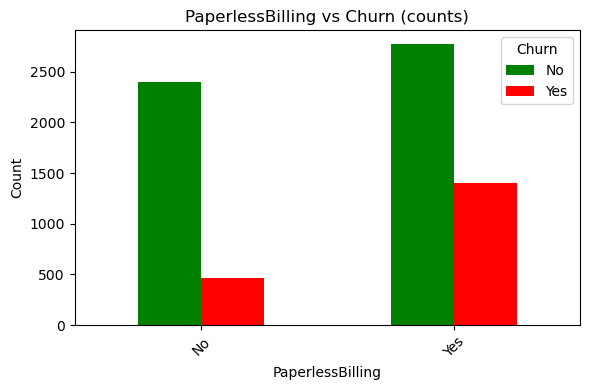

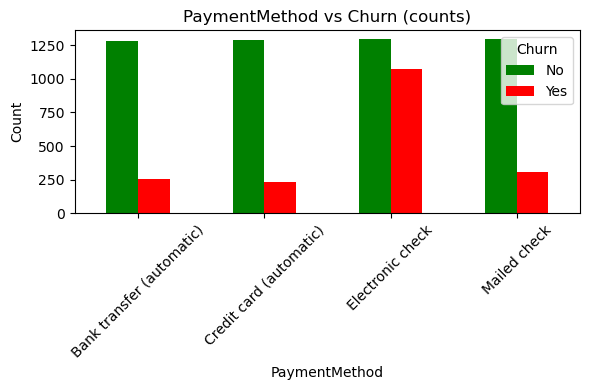

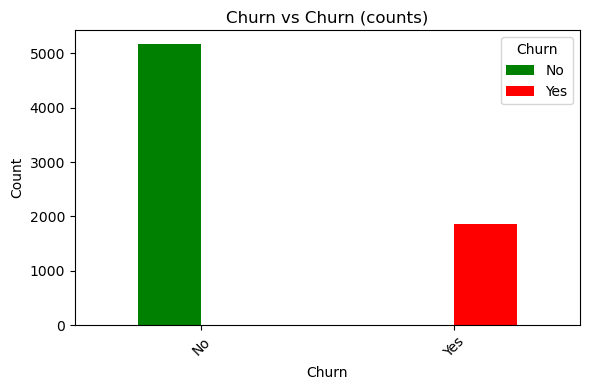

In [10]:
for col in telco_churn.select_dtypes(include=['object']).columns:
    grouped = telco_churn.groupby([col, 'Churn']).size().unstack() 
    
    ax = grouped.plot(kind='bar',
                    color=[palette.get(c, 'grey') for c in grouped.columns],
                    figsize=(6, 4),
                    title=f"{col} vs Churn (counts)")

    ax.set_ylabel("Count")
    ax.set_xlabel(col)
    ax.tick_params(axis='x', rotation=45)          
    ax.legend(title="Churn")                      
    plt.tight_layout()                           
    plt.show()


In [11]:
# train/test splitting - using Stratified Shuffling
from sklearn.model_selection import StratifiedShuffleSplit

df = telco_churn.copy()

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['Churn']):
    train = df.iloc[train_index] # select train row
    test = df.iloc[test_index] # select test row

print(test['Churn'].value_counts() / len(test))    
print(train['Churn'].value_counts() / len(train))

# good split

Churn
No     0.734186
Yes    0.265814
Name: count, dtype: float64
Churn
No     0.734222
Yes    0.265778
Name: count, dtype: float64


In [12]:
# data encoding - categorical first

cat_data = df.select_dtypes(include=['object']) # only categorical data here
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder(sparse_output=False) # so we can put them back into df

# separate the binary vs multi column values
binary_cols = [c for c in cat_data if cat_data[c].nunique() == 2]
multi_cols  = [c for c in cat_data if cat_data[c].nunique() > 2]

# label encoder
for col in binary_cols:
    le.fit(train[col])
    train.loc[:,col] = le.transform(train[col])
    test.loc[:,col] = le.transform(test[col])
    
# one hot encode the multi_cols
ohe.fit(train[multi_cols]) # ohe expects 2D series, so do not put in individual 1D single column

train_ohe = ohe.transform(train[multi_cols])
test_ohe = ohe.transform(test[multi_cols])

# wrap the arrays in dataframes with proper column names + indices
ohe_cols = ohe.get_feature_names_out(multi_cols)
train_ohe_df = pd.DataFrame(train_ohe, columns=ohe_cols, index=train.index)
test_ohe_df = pd.DataFrame(test_ohe, columns=ohe_cols, index=test.index)

# drop the pre-encoded columns
train = train.drop(columns=multi_cols)
test = test.drop(columns=multi_cols)

# concat the new one-hot columns
train = pd.concat([train, train_ohe_df], axis=1)
test = pd.concat([test, test_ohe_df], axis=1)

# quick check
print(train.shape, test.shape)
print(train.head())



(5625, 41) (1407, 41)
     gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
1413      1              0       1          1      65            1   
7003      1              0       0          0      26            0   
3355      0              0       1          0      68            1   
4494      1              0       0          0       3            1   
3541      0              0       1          0      49            0   

     PaperlessBilling  MonthlyCharges  TotalCharges Churn  ...  \
1413                0           94.55       6078.75     0  ...   
7003                0           35.75       1022.50     0  ...   
3355                0           90.20       6297.65     0  ...   
4494                0           84.30        235.05     0  ...   
3541                0           40.65       2070.75     0  ...   

      StreamingMovies_No  StreamingMovies_No internet service  \
1413                 1.0                                  0.0   
7003                 1.0      

In [ ]:
# standardise the numerical values - to range 0-1
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_train_scaled = scaler.fit_transform(train[num_cols])
num_test_scaled = scaler.transform(test[num_cols])

# wrap the scaled arrays in df with same index
train_num_df = pd.DataFrame(num_train_scaled, columns=num_cols, index=train.index)
test_num_df = pd.DataFrame(num_test_scaled, columns=num_cols, index=test.index)

# replace the original numeric columns with scaled versions
train = pd.concat([train.drop(columns=num_cols), train_num_df], axis=1)
test  = pd.concat([test.drop(columns=num_cols),  test_num_df],  axis=1)

# quick sanity check
print(train[num_cols].describe().round(3))
print(test[num_cols].describe().round(3))


         tenure  MonthlyCharges  TotalCharges
count  5625.000        5625.000      5625.000
mean      0.445           0.465         0.263
std       0.346           0.300         0.263
min       0.000           0.000         0.000
25%       0.113           0.174         0.045
50%       0.394           0.521         0.161
75%       0.775           0.715         0.437
max       1.000           1.000         1.000
         tenure  MonthlyCharges  TotalCharges
count  1407.000        1407.000      1407.000
mean      0.435           0.455         0.253
std       0.346           0.299         0.257
min       0.000          -0.001         0.000
25%       0.085           0.161         0.038
50%       0.380           0.514         0.155
75%       0.754           0.708         0.428
max       1.000           1.001         0.999


In [26]:
# prepare X_train, X_test, Y_train, Y_test
X_train = train.drop("Churn", axis=1)
y_train = train["Churn"].astype(int)

X_test = test.drop("Churn", axis=1)
y_test = test["Churn"].astype(int)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[INFO] the best params to be used ({'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}, 0.5939316195032865)
[INFO] training...
              precision    recall  f1-score   support

    No Churn       0.85      0.89      0.87      1033
       Churn       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

ROC AUC Score: 0.84


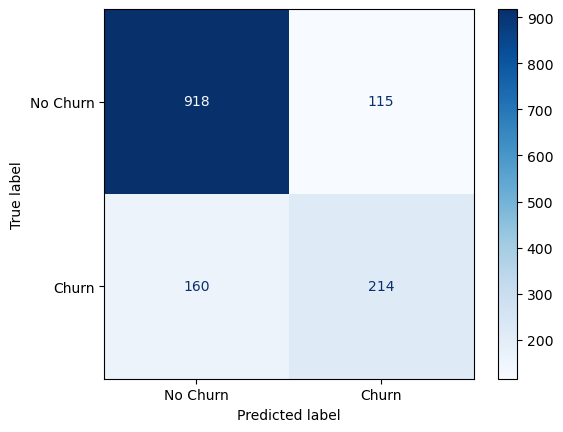

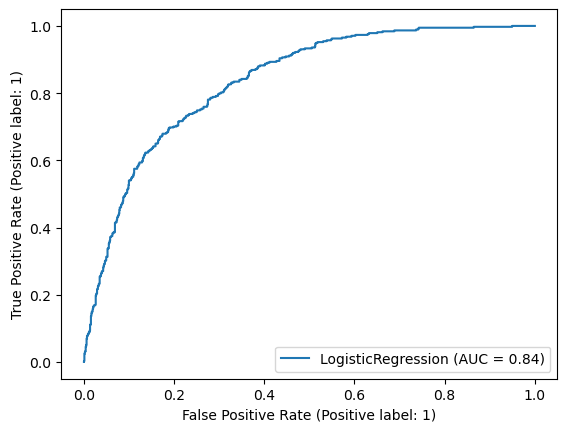

In [ ]:
# === Model testing ===
# From simple models to complex ones: Logistic Regression -> Decision Tree Classifier -> XGBoost -> Sequential ANN
# use cross validation to ensure the best metrics were chosen
# each ML will be evaluated using classification report, confusion matrix, ROC curve (showing trade off between sensitivity and 1-specificity)

# ==== Logistic Regression ====
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
clf = LogisticRegression(solver='liblinear', max_iter=1000)

# apply GridSearchCV to find the best params
param_grid = [
    {
        'solver': ['liblinear',],
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1],
    },
    # lbfgs and sag support l2 only
     {
        'solver': ['lbfgs',],
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1],
    },
     
    {
        'solver': ['sag',],
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1],
    },
    # saga with l1, l2
    {
        'solver': ['saga',],
        'penalty': ['l1','l2'],
        'C': [0.01, 0.1, 1],
    },
    # saga with elasticnet, required l1_ratio
    {
        'solver': ['saga',],
        'penalty': ['elasticnet'],
        'C': [0.01, 0.1, 1],
        'l1_ratio': [0.3, 0.5, 0.7]
    }
]

# setup GridSearchCV
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='f1', # instead of accuracy because of the imbalance of Churn
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_result = grid_search.best_params_, grid_search.best_score_
print("[INFO] the best params to be used", best_result)

best_params = grid_search.best_params_
best_params["random_state"] = 0

clf = LogisticRegression(**best_params)

print("[INFO] training...")

clf.fit(X_train, y_train)

print(classification_report(
    y_test,
    clf.predict(X_test),
    target_names=["No Churn", "Churn"]
))

# make confusion matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap='Blues')


# ROC curve - show the tradeoff between true positive rate (recall) and false positive rate
from sklearn.metrics import RocCurveDisplay, roc_auc_score

# plotting
RocCurveDisplay.from_estimator(clf, X_test, y_test)

# get the AUC score
y_probs = clf.predict_proba(X_test)[:, 1]  # Probabilities for class 1
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_auc:.2f}") # 0.84 - good result

# note: 0.65 of predicted churns were actual churns
# caught 0.57 of actual churners (recall)
# f1 = 0.61 moderate balance between precision and recall

# ROC AUC score is 0.84 - good, since dataset is imbalanced, AUC is a better metric than acc